In [4]:
import numpy as np
import pandas as pd

#### On créé des données factices avec lesquelles on va travailler

In [338]:
# Création de données aléatoires pour chaque colonne
np.random.seed(0)

temperature = np.random.uniform(10, 30, 1000)  # Température en degrés Celsius
humidite = np.random.uniform(40, 80, 1000)  # Humidité relative en pourcentage
pression = np.random.uniform(500, 9000, 1000)  # Pression atmosphérique en hPa
precipitations = np.random.uniform(0, 20, 1000)  # Précipitations en millimètres

# Création d'un DataFrame pandas avec les données
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidite': humidite,
    'Pression': pression,
    'Precipitations': precipitations
})

# Affichage du DataFrame
data['Pression'] = data['Pression'] /100

data

,Temperature,Humidite,Pression,Precipitations
0,20.976270,63.715211,73.979070,8.279250
1,24.303787,40.402548,45.467139,12.592366
2,22.055268,59.033048,49.468259,15.571685
3,20.897664,68.350816,26.294250,17.031156
4,18.473096,41.759017,56.428656,16.328254
...,...,...,...,...
995,11.953527,71.651262,85.043401,6.992787
996,20.298444,68.847925,51.421284,8.697473
997,28.768240,59.204312,32.507165,16.600059
998,14.572931,65.754561,74.151326,18.656124


In [349]:
X = data.loc[:799, ['Humidite', 'Pression', 'Precipitations']].values
y = data.loc[:799, 'Temperature'].values

In [353]:
X_val = data.loc[800:, ['Humidite', 'Pression', 'Precipitations']].values
y_val = data.loc[800:, 'Temperature'].values

#### On créé une fonction qui nous permet de normaliser nos données numériques

In [356]:
def normalize_data(X):
    return (X - X.mean()) / np.std(X)

In [357]:
X_normalize = normalize_data(X)
X_normalize

array([[ 0.90619967,  1.28988256, -1.16610366],
       [ 0.03472728,  0.22405148, -1.00487105],
       [ 0.73117137,  0.37362109, -0.89349834],
       ...,
       [ 0.85871065,  1.04381086, -0.85097629],
       [ 1.27054927,  1.43750789, -1.12758272],
       [ 0.43544148,  0.15166906, -1.42656631]])

#### On créé enfin la fonction d'entrainement par descente de gradient

In [358]:
def train_linear_regression(X, y, nb_iter, learning_rate):
    np.random.seed(0)
    weights = np.random.normal(size=(X.shape[1]))
    n_rows = X.shape[0]
    history = {'Iter' : [], 'MSE' : [], 'RMSE' : [], 'Weights' : []}

    for i in range(nb_iter):
        history['Iter'].append(i+1)
        history['Weights'].append(weights)
        predictions = X.dot(weights)

        MSE = np.mean((y - predictions)**2)
        history['MSE'].append(MSE)
        RMSE = np.sqrt(MSE)
        history['RMSE'].append(RMSE)

        grad_weights = (2/n_rows) * (X.T).dot((predictions - y))
        weights = weights - (learning_rate * grad_weights)

    for i in range(0, 4):
        print(f"Iteration n°{history['Iter'][i]}, MSE : {history['MSE'][i]}, RMSE : {history['RMSE'][i]}")
    print('...')
    for i in range(-4, 0):
        print(f"Iteration n°{history['Iter'][i]}, MSE : {history['MSE'][i]}, RMSE : {history['RMSE'][i]}")

    return history

#### Attention, l'implémentation est très sensible à la valeur du learning rate, ne pas hésiter à tester différentes valeurs

In [417]:
history = train_linear_regression(X_normalize, y, nb_iter=1000, learning_rate=0.003)

Iteration n°1, MSE : 412.26797715830514, RMSE : 20.30438320063688
Iteration n°2, MSE : 403.66053194554013, RMSE : 20.091304884092025
Iteration n°3, MSE : 395.26624318960893, RMSE : 19.88130386040133
Iteration n°4, MSE : 387.0797817314179, RMSE : 19.67434323507186
...
Iteration n°997, MSE : 48.77880421904011, RMSE : 6.9841824302519555
Iteration n°998, MSE : 48.77467797461541, RMSE : 6.9838870247603095
Iteration n°999, MSE : 48.77055893067362, RMSE : 6.983592122301647
Iteration n°1000, MSE : 48.76644707366933, RMSE : 6.983297721969852


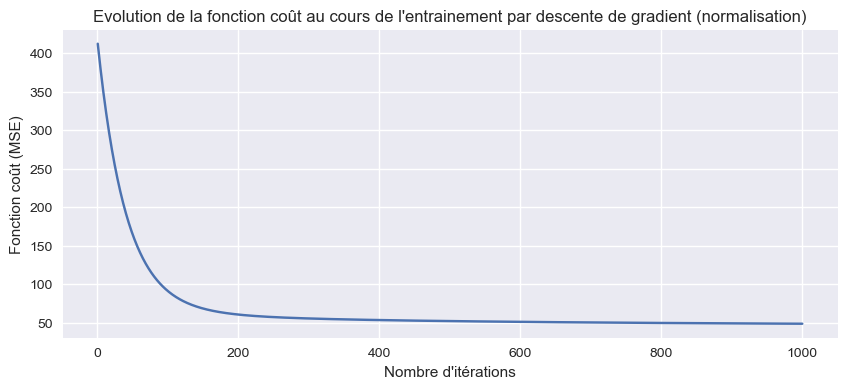

In [418]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(10, 4))
plt.plot(history['Iter'], history['MSE'])
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction coût (MSE)")
plt.title("Evolution de la fonction coût au cours de l'entrainement par descente de gradient (normalisation)")
plt.show()

In [419]:
history = train_linear_regression(X, y, nb_iter=1000, learning_rate=0.0001)

Iteration n°1, MSE : 14026.70666461966, RMSE : 118.43439814774955
Iteration n°2, MSE : 1303.352773789505, RMSE : 36.10197742215106
Iteration n°3, MSE : 297.6023634236774, RMSE : 17.25115542286016
Iteration n°4, MSE : 198.04506628230928, RMSE : 14.072848548972212
...
Iteration n°997, MSE : 45.931294262211786, RMSE : 6.777263036227219
Iteration n°998, MSE : 45.93129416569698, RMSE : 6.7772630291067335
Iteration n°999, MSE : 45.93129407057076, RMSE : 6.777263022088692
Iteration n°1000, MSE : 45.93129397681314, RMSE : 6.777263015171622


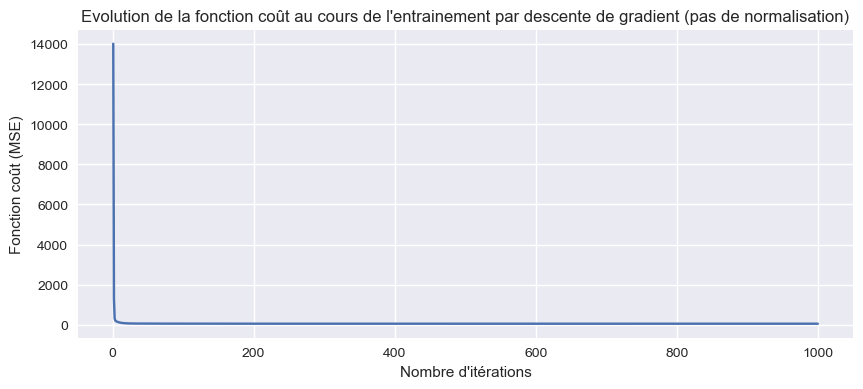

In [425]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize=(10, 4))
plt.plot(history['Iter'], history['MSE'])
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction coût (MSE)")
plt.title("Evolution de la fonction coût au cours de l'entrainement par descente de gradient (pas de normalisation)")
plt.show()

#### Nouvelle prédiction à partir du modèle entrainé 

In [421]:
final_weights = history['Weights'][-1]
print("Meilleurs paramètres du modèle :", final_weights)
new_X_value = np.array([80, 41, 10])
print("Nouvelle feature x :", new_X_value)

prediction = new_X_value.dot(final_weights)
print("Prédiction :", prediction)

Meilleurs paramètres du modèle : [0.25824124 0.04052273 0.17032108]
Nouvelle feature x : [80 41 10]
Prédiction : 24.02394184050671


In [422]:
train_rmse = np.sqrt(np.mean((X.dot(final_weights) - y)**2))
train_rmse

6.777263015171622

In [423]:
val_rmse = np.sqrt(np.mean((X_val.dot(final_weights) - y_val)**2))
val_rmse

6.884343776429267